[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/IKMLab/FDA_regression_svm_nn/blob/master/Support_Vector_Machine_Tutorial.ipynb)

# Support Vector Machine Tutorial

---

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. <br>
In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. - [reference](https://docs.opencv.org/2.4/doc/tutorials/ml/introduction_to_svm/introduction_to_svm.html)
![](https://i.imgur.com/8M1p9kE.png)

## Iris dataset
---

The [iris dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) is a classic and very easy multi-class classification dataset.

![](https://i.imgur.com/plJFlkx.png)


### Import library

In [0]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Load Iris dataset

In [2]:
iris = datasets.load_iris()
print("Feature_naems: " + str(iris.feature_names))
print("Target_names: " + str(iris.target_names))

Feature_naems: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target_names: ['setosa' 'versicolor' 'virginica']


### Data preparing
In the begining, we choose two features to do the classification task.

In [3]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])

iris_data = pd.concat([x, y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'sepal width (cm)','target']]

# iris_data = iris_data[iris_data['target'].isin([0,2])]

iris_data.head()

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_data[['sepal length (cm)', 'sepal width (cm)']], iris_data[['target']], test_size=0.2, random_state=0)

### Standardization

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (eg Gaussian with 0 mean and unit variance).

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Import  svm model in the sklearn

Internally, the svm model in sklearn use [libsvm](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) to handle all computations. <br>
Moreover, you could also use **NuSVM** or **LinearSVM** for further usage. (it would be mentioned later)

In [0]:
from sklearn.svm import SVC

### Penalty parameter C
- Penalty parameter C of the error term
  - Large C : hard-margin
  - Small C : soft-margin


### Kernel functions
In sklearn, there are four build-in kernel functions, ['linear', 'poly', 'rbf', 'sigmoid']((http://scikit-learn.org/stable/modules/svm.html#svm-kernels). <br>
Also, you could use your custom kernel function as well.

In [7]:
from sklearn.metrics import accuracy_score

# Custom kernel function
def my_kernel(X, Y):
    return np.dot(X, Y.T)
  
penalty = 0.05

svm = SVC(C=penalty, kernel="linear", probability=True)
svm.fit(X_train, y_train['target'].values)
  
acc_rate = accuracy_score(y_test['target'].values, svm.predict(X_test)) * 100
print("Penalty = %.2f, Accuracy = %.2f %%" % (penalty, acc_rate))
 

Penalty = 0.05, Accuracy = 63.33 %


### Support vectors

In [8]:
for i, sv in enumerate(zip(svm.support_, svm.support_vectors_)):
    if i < 5:
        print("Index: %s; Support vector: %s" % (sv[0], sv[1]))

Index: 2; Support vector: [5.2 3.5]
Index: 6; Support vector: [5.7 3.8]
Index: 11; Support vector: [4.7 3.2]
Index: 13; Support vector: [5.  3.5]
Index: 14; Support vector: [5.4 3.7]


### Number of **support vectors** in each class

In [9]:
svm.n_support_

array([31, 37, 35], dtype=int32)

In [10]:
print("The labels by model prediction : %s" % svm.predict(X_test))
print("Real labels in the testing set : %s" % y_test['target'].values)

The labels by model prediction : [1 1 0 2 0 2 0 2 2 2 1 2 2 2 2 0 1 1 0 0 1 1 0 0 2 0 0 2 1 0]
Real labels in the testing set : [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


### Prediction probability for each label

In [11]:
for prob in svm.predict_proba(X_test):
    print(["%.2f" % p for p in prob] )

['0.04', '0.58', '0.38']
['0.00', '0.59', '0.40']
['0.95', '0.01', '0.03']
['0.00', '0.22', '0.78']
['0.95', '0.02', '0.02']
['0.02', '0.41', '0.57']
['0.97', '0.01', '0.02']
['0.00', '0.33', '0.66']
['0.00', '0.33', '0.67']
['0.01', '0.51', '0.48']
['0.01', '0.53', '0.46']
['0.01', '0.40', '0.59']
['0.01', '0.51', '0.48']
['0.00', '0.41', '0.59']
['0.02', '0.50', '0.48']
['0.99', '0.00', '0.01']
['0.02', '0.53', '0.45']
['0.06', '0.67', '0.27']
['0.91', '0.07', '0.02']
['0.94', '0.02', '0.04']
['0.07', '0.63', '0.30']
['0.12', '0.59', '0.29']
['0.99', '0.01', '0.01']
['0.98', '0.01', '0.00']
['0.01', '0.49', '0.51']
['1.00', '0.00', '0.00']
['0.98', '0.01', '0.01']
['0.01', '0.48', '0.51']
['0.09', '0.79', '0.12']
['0.95', '0.02', '0.02']


### Plot the classification results

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c = ['red', 'blue', 'lightgreen'][idx],
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

In [0]:
def plot_train_test(location, x, y):
  
    plt.subplot(1,2,location)

    plot_decision_regions(x, y, classifier=svm)
    if location == 1:
      plt.title("Training")
    elif location == 2:
      plt.title("Testing")
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.legend(loc='upper left')
    plt.tight_layout()
    

In [21]:
penalty = 0.05

svm = SVC(C=penalty, kernel="linear")
svm.fit(X_train, y_train['target'].values)

acc_train = accuracy_score(y_train['target'].values, svm.predict(X_train)) * 100
acc_test = accuracy_score(y_test['target'].values, svm.predict(X_test)) * 100
print("Penalty = %.2f, Train accuracy = %.2f %%, Test accuracy = %.2f %%" % (penalty, acc_train, acc_test))

Penalty = 0.05, Train accuracy = 82.50 %, Test accuracy = 63.33 %


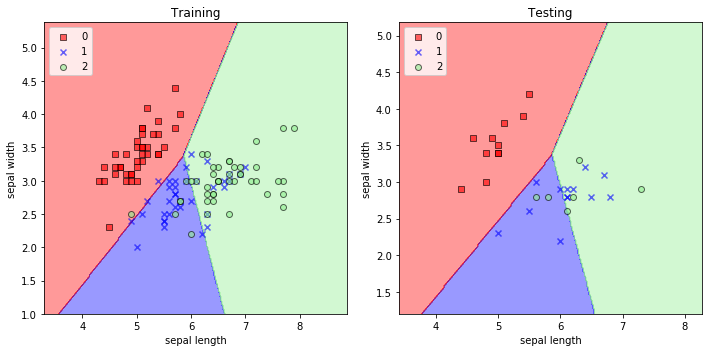

C: 0.05, Train Acc: 82.50 %, Test Acc: 63.33 %
Kernel function : linear


In [22]:
plt.figure(figsize=(10,5))

plot_train_test(1, X_train.values, y_train['target'].values)
plot_train_test(2, X_test.values, y_test['target'].values)

plt.show()

print("C: %.2f, Train Acc: %.2f %%, Test Acc: %.2f %%" % (penalty, acc_train, acc_test))
print("Kernel function : linear")

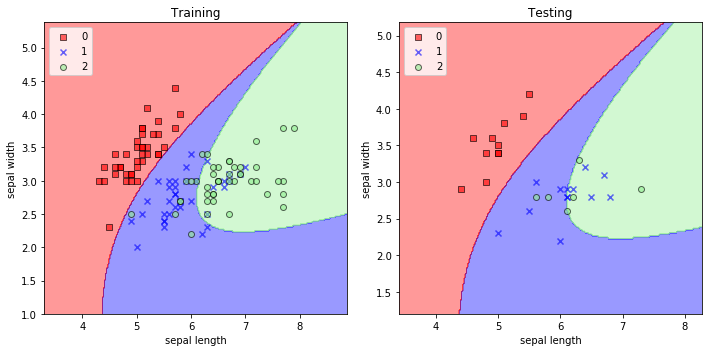

C: 0.05, Train Acc: 84.17 %, Test Acc: 73.33 %
Kernel function : poly


In [16]:
plt.figure(figsize=(10,5))

plot_train_test(1, X_train.values, y_train['target'].values)
plot_train_test(2, X_test.values, y_test['target'].values)

plt.show()

print("C: %.2f, Train Acc: %.2f %%, Test Acc: %.2f %%" % (penalty, acc_train, acc_test))
print("Kernel function : poly")

# Supplement

## Other svm models in sklearn

### [NuSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.NuSVC.html#sklearn.svm.NuSVC)
Similar to SVC but uses a parameter(nu) to control the number of support vectors.

- **nu** : float, optional (default=0.5)
    - An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors. Should be in the interval (0, 1].

In [0]:
from sklearn.svm import NuSVC
nuSvm = NuSVC(nu=0.1, kernel="linear", probability=True)

### [LinearSVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

Similar to SVC with parameter kernel=’linear’, but implemented in terms of [liblinear](https://www.csie.ntu.edu.tw/~cjlin/liblinear/) rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

	
- **penalty** : string, ‘l1’ or ‘l2’ (default=’l2’)

    - Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

- **loss** : string, ‘hinge’ or ‘squared_hinge’ (default=’squared_hinge’)

    - Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.

- **dual** : bool, (default=True)

    - Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

In [0]:
from sklearn.svm import LinearSVC
linearSvm = LinearSVC(penalty='l1', loss='hinge', dual=False)